In [20]:
import numpy as np
import pandas as pd
import lightgbm as lgb

demo = False

In [2]:
from kaggle.competitions import twosigmanews
env = twosigmanews.make_env()

Loading the data... This could take a minute.
Done!


In [5]:
(market_train_df, news_train_df) = env.get_training_data()

if demo:
    market_train_df = market_train_df.tail(100000)
    news_train_df = news_train_df.tail(300000)

# Save universe data for latter use
universe = market_train_df['universe']
time = market_train_df['time']

In [24]:
def sigma_score(preds, valid_data):
    labels = valid_data.get_label()
    x_t = preds * labels # * df_valid['universe'] # -> Here we take out the 'universe' term because we already keep only those equals to 1.
    # Here we take advantage of the fact that `labels` (used to calculate `x_t`)
    # x_t = x_t.groupby(valid_data.params['extra_time']).sum()
    score = x_t.mean() / x_t.std()

    return 'sigma_score', score, True

In [9]:
#%%time
# code mostly takes from this kernel: https://www.kaggle.com/ashishpatel26/bird-eye-view-of-two-sigma-xgb

def data_prep(market_df,news_df):
#     market_df['time'] = market_df.time.dt.date
#     market_df['returnsOpenPrevRaw1_to_volume'] = market_df['returnsOpenPrevRaw1'] / market_df['volume']
#     market_df['close_to_open'] = market_df['close'] / market_df['open']
#     market_df['volume_to_mean'] = market_df['volume'] / market_df['volume'].mean()
    
#     news_df['time'] = news_df.time.dt.hour
#     news_df['sourceTimestamp']= news_df.sourceTimestamp.dt.hour
#     news_df['firstCreated'] = news_df.firstCreated.dt.date
#     news_df['assetCodesLen'] = news_df['assetCodes'].map(lambda x: len(eval(x)))
#     news_df['assetCodes'] = news_df['assetCodes'].map(lambda x: list(eval(x))[0])
#     news_df['headlineLen'] = news_df['headline'].apply(lambda x: len(x))
#     news_df['assetCodesLen'] = news_df['assetCodes'].apply(lambda x: len(x))
#     news_df['asset_sentiment_count'] = news_df.groupby(['assetName', 'sentimentClass'])['time'].transform('count')
#     news_df['asset_sentence_mean'] = news_df.groupby(['assetName', 'sentenceCount'])['time'].transform('mean')
#     lbl = {k: v for v, k in enumerate(news_df['headlineTag'].unique())}
#     news_df['headlineTagT'] = news_df['headlineTag'].map(lbl)
#     kcol = ['firstCreated', 'assetCodes']
#     news_df = news_df.groupby(kcol, as_index=False).mean()

#     market_df = pd.merge(market_df, news_df, how='left', left_on=['time', 'assetCode'], 
#                             right_on=['firstCreated', 'assetCodes'])

#     lbl = {k: v for v, k in enumerate(market_df['assetCode'].unique())}
#     market_df['assetCodeT'] = market_df['assetCode'].map(lbl)
    
#     market_df = market_df.dropna(axis=0)
    
    return market_df

market_train = data_prep(market_train_df, news_train_df)
market_train

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1657300.0,52.37,52.40,-0.000191,0.008468,NaN,NaN,0.089000,0.077746,NaN,NaN,0.058680,1.0
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,1186200.0,23.63,24.13,-0.020721,-0.007404,NaN,NaN,0.005104,0.026809,NaN,NaN,-0.044285,0.0
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,301200.0,26.19,25.90,0.013545,0.014890,NaN,NaN,0.068980,0.047311,NaN,NaN,0.016578,0.0
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,5692300.0,52.87,52.50,-0.002453,-0.004739,NaN,NaN,0.001515,-0.004928,NaN,NaN,0.009861,1.0
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,401800.0,52.46,52.10,0.014112,0.024784,NaN,NaN,0.042321,0.027411,NaN,NaN,0.012917,1.0


In [10]:
# # Save universe data for latter use
universe = market_train['universe']
time = market_train['time']

print(market_train.shape)
up = market_train.returnsOpenNextMktres10 >= 0

fcol = [c for c in market_train_df.columns if c not in ['assetCode', 'assetCodes', 'assetCodesLen', 'assetName', 'assetCodeT', 'volume_to_mean',
                                             'firstCreated', 'headline', 'headlineTag', 'marketCommentary', 'provider', 'returnsOpenPrevRaw1_to_volume',
                                             'returnsOpenNextMktres10', 'sourceId', 'subjects', 'time', 'time_x', 'universe','sourceTimestamp']]

(4072956, 16)


In [13]:
X = market_train[fcol]#.values
up = up.values
y = market_train.returnsOpenNextMktres10#.values

In [16]:
# Scaling of X values
mins = np.min(X, axis=0)
maxs = np.max(X, axis=0)
rng = maxs - mins
X = 1 - ((maxs - X) / rng)

In [17]:
n_train = int(X.shape[0] * 0.8)

X_train, y_train = X.iloc[:n_train], y.iloc[:n_train]
X_valid, y_valid = X.iloc[n_train:], y.iloc[n_train:]

In [18]:
# For valid data, keep only those with universe > 0. This will help calculate the metric
u_valid = (universe.iloc[n_train:] > 0)
t_valid = time.iloc[n_train:]

X_valid = X_valid[u_valid]
y_valid = y_valid[u_valid]
t_valid = t_valid[u_valid]
del u_valid

In [21]:
# Creat lgb datasets
train_cols = X.columns.tolist()
categorical_cols = [] # ['assetCode', 'assetName', 'dayofweek', 'month']

# Note: y data is expected to be a pandas Series, as we will use its group_by function in `sigma_score`
dtrain = lgb.Dataset(X_train.values, y_train, feature_name=train_cols, categorical_feature=categorical_cols, free_raw_data=False)
dvalid = lgb.Dataset(X_valid.values, y_valid, feature_name=train_cols, categorical_feature=categorical_cols, free_raw_data=False)

In [22]:
lgb_params = dict(
    objective = 'regression_l1',
    learning_rate = 0.1,
    num_leaves = 127,
    max_depth = -1,
#     min_data_in_leaf = 1000,
#     min_sum_hessian_in_leaf = 10,
    bagging_fraction = 0.75,
    bagging_freq = 2,
    feature_fraction = 0.5,
    lambda_l1 = 0.0,
    lambda_l2 = 1.0,
    metric = 'None', # This will ignore the loss objetive and use sigma_score instead,
    seed = 42 # Change for better luck! :)
)

In [25]:
evals_result = {}
m = lgb.train(lgb_params, dtrain, num_boost_round=1000, valid_sets=(dvalid,), valid_names=('valid',), verbose_eval=25,
              early_stopping_rounds=100, 
              feval=sigma_score, 
              evals_result=evals_result)

df_result = pd.DataFrame(evals_result['valid'])

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 100 rounds.
[25]	valid's sigma_score: 0.0659798
[50]	valid's sigma_score: 0.0659602
[75]	valid's sigma_score: 0.064899
[100]	valid's sigma_score: 0.0635442
Early stopping, best iteration is:
[14]	valid's sigma_score: 0.0674438


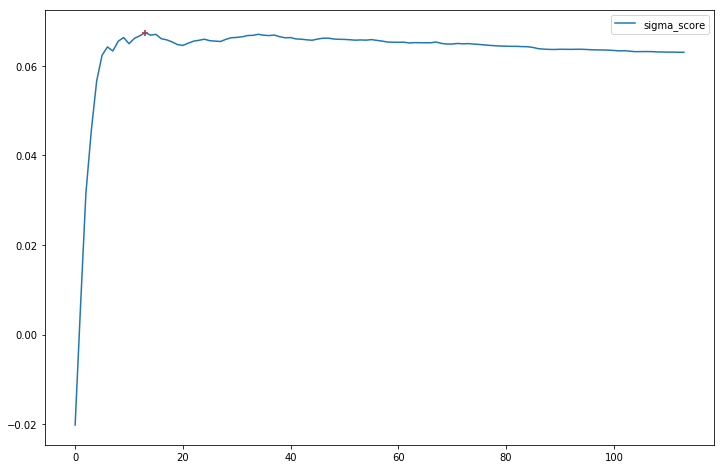

In [26]:
ax = df_result.plot(figsize=(12, 8))
ax.scatter(df_result['sigma_score'].idxmax(), df_result['sigma_score'].max(), marker='+', color='red')

In [27]:
num_boost_round, valid_score = df_result['sigma_score'].idxmax()+1, df_result['sigma_score'].max()
print(lgb_params)
print(f'Best score was {valid_score:.5f} on round {num_boost_round}')

{'objective': 'regression_l1', 'learning_rate': 0.1, 'num_leaves': 127, 'max_depth': -1, 'bagging_fraction': 0.75, 'bagging_freq': 2, 'feature_fraction': 0.5, 'lambda_l1': 0.0, 'lambda_l2': 1.0, 'metric': 'None', 'seed': 42}
Best score was 0.06744 on round 14


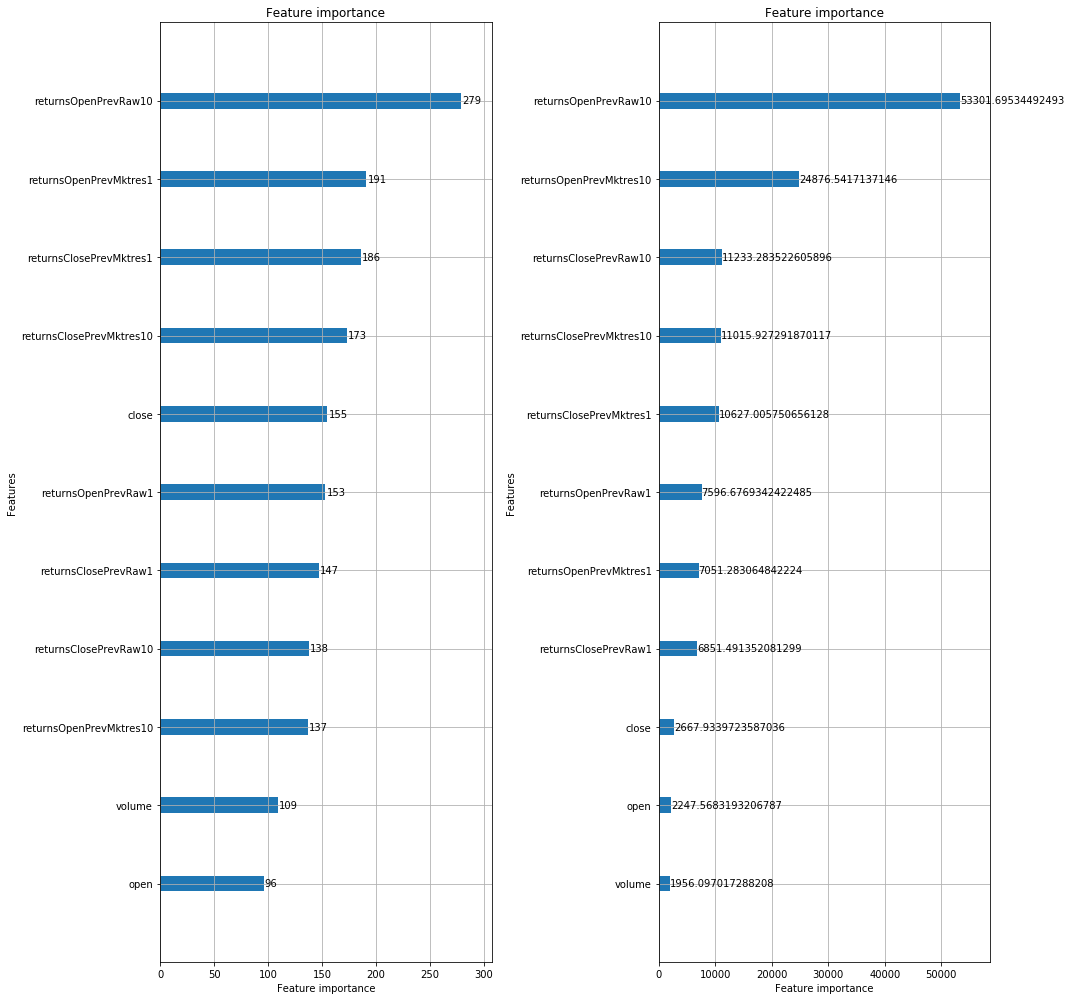

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 14))
lgb.plot_importance(m, ax=ax[0])
lgb.plot_importance(m, ax=ax[1], importance_type='gain')
fig.tight_layout()

In [ ]:
# def make_predictions(predictions_template_df, market_obs_df, news_obs_df, le):
#     market_obs_df = data_prep(market_obs_df, news_obs_df)
#     predictions_template_df.confidenceValue = np.clip(model.predict(x), -1, 1)

In [32]:
# # days = env.get_prediction_days()

# for (market_obs_df, news_obs_df, predictions_template_df) in days:
#     make_predictions(predictions_template_df, market_obs_df, news_obs_df, le)
#     env.predict(predictions_template_df)
# print('Done!')

Done!


In [34]:
# env.write_submission_file()